In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')

In [4]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [5]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [6]:
df.rename(columns ={'Monthly milk production: pounds per cow. Jan 62 ? Dec 75': 'Milk produced'}, inplace=True)

In [7]:
df.head()

,Month,Milk produced
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [8]:
df.tail()

,Month,Milk produced
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [9]:
df.drop(168,axis = 0,inplace = True)

In [10]:
df['Month'] = pd.to_datetime(df['Month'])

In [12]:
df.head()

,Month,Milk produced
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [13]:
df.dtypes

Month            datetime64[ns]
Milk produced           float64
dtype: object

In [14]:
df.set_index('Month',inplace=True)

In [15]:
df.shape

(168, 1)

In [16]:
df.head()

,Milk produced
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk produced,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


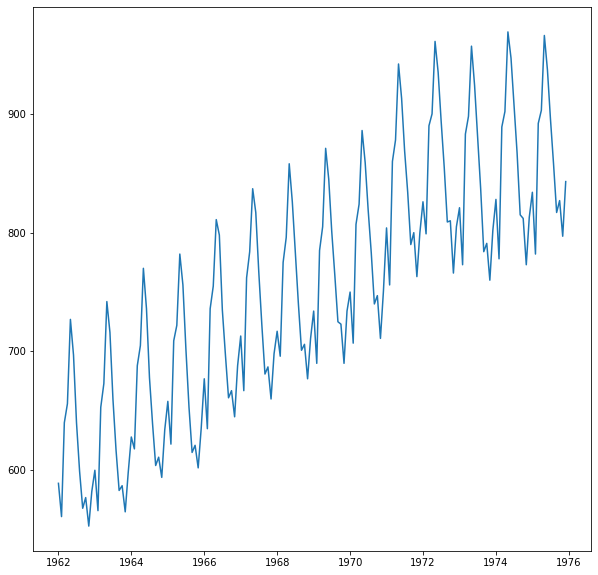

In [18]:
plt.figure(figsize=(10,10))
plt.plot(df['Milk produced'])

In [20]:
timeseries = df['Milk produced']

In [21]:
type(timeseries)

pandas.core.series.Series

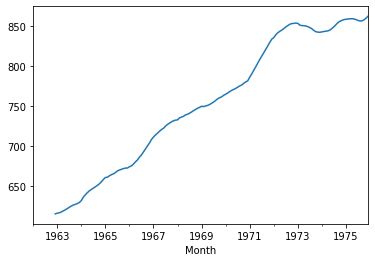

In [24]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')

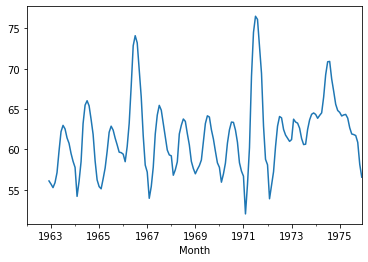

In [ ]:
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')

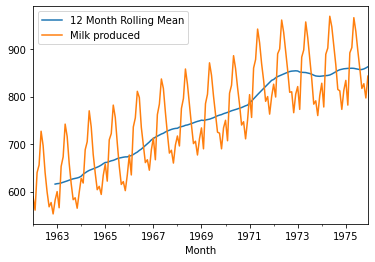

In [ ]:
timeseries.rolling(12).mean().plot(label = '12 Month Rolling Mean')
timeseries.plot()
plt.legend()

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose #### classical decomposition

In [26]:
decomposition = seasonal_decompose(df['Milk produced'], freq=12)  

<ipython-input-26-fb1c3419a71a>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(df['Milk produced'], freq=12)


<Figure size 432x288 with 0 Axes>

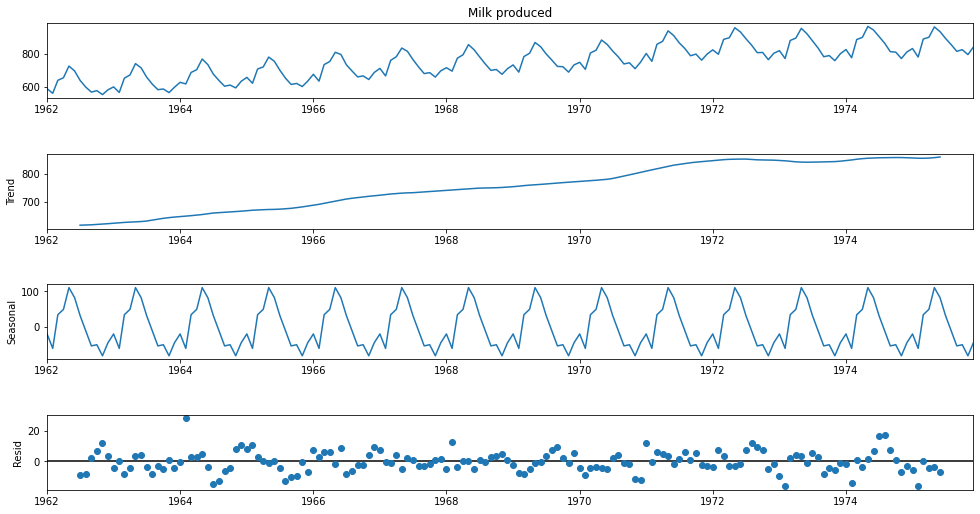

In [27]:
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [ ]:
df.head()

,Milk produced
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [28]:
from statsmodels.tsa.stattools import adfuller ### This function does the dickey fuller

In [29]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic',
              'p-value',
              '#Lags Used',
              'Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] < 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [30]:
result = adf_check(timeseries)

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.3038115874221308
p-value : 0.6274267086030311
#Lags Used : 13
Number of Observations Used : 154
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [31]:
df['Milk produced'] #### yt

Month
1962-01-01    589.0
1962-02-01    561.0
1962-03-01    640.0
1962-04-01    656.0
1962-05-01    727.0
              ...  
1975-08-01    858.0
1975-09-01    817.0
1975-10-01    827.0
1975-11-01    797.0
1975-12-01    843.0
Name: Milk produced, Length: 168, dtype: float64

In [32]:
df['Milk produced'].shift(1) #### yt-1

Month
1962-01-01      NaN
1962-02-01    589.0
1962-03-01    561.0
1962-04-01    640.0
1962-05-01    656.0
              ...  
1975-08-01    896.0
1975-09-01    858.0
1975-10-01    817.0
1975-11-01    827.0
1975-12-01    797.0
Name: Milk produced, Length: 168, dtype: float64

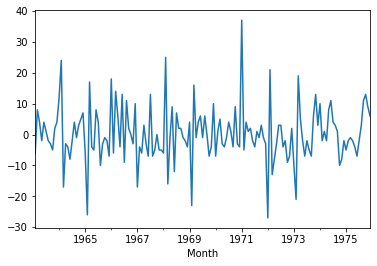

In [33]:
  #### First order normal differencing

seasonality_removed = df['Milk produced'] - df['Milk produced'].shift(12) #### First order seasonal differencing

trend_seasonality_removed = seasonality_removed - seasonality_removed.shift(1) #### first order normal differencing

trend_seasonality_removed = trend_seasonality_removed.dropna()

trend_seasonality_removed.plot()

In [34]:
print(adf_check(trend_seasonality_removed)) ### first order seasonal differencing and first order trend differencing

Augmented Dickey-Fuller Test:
ADF Test Statistic : -5.038002274921981
p-value : 1.865423431878848e-05
#Lags Used : 11
Number of Observations Used : 143
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary
None


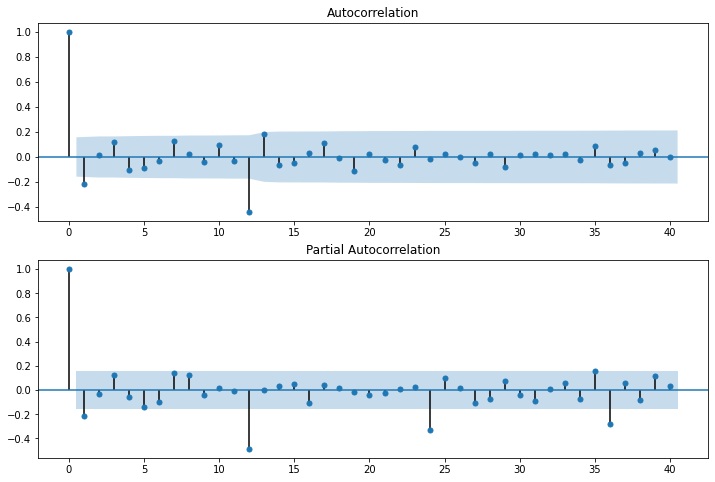

In [35]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(trend_seasonality_removed,lags = 40,ax = ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(trend_seasonality_removed,lags = 40, ax = ax2)

In [50]:
model = sm.tsa.statespace.SARIMAX(df['Milk produced'],
                                  order = (1,1,0),
                                  seasonal_order = (1,1,0,12), 
                                  enforce_stationarity=False, 
                                  enforce_invertibility=False)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [49]:
results = model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                      Milk produced   No. Observations:                  168
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -490.509
Date:                            Thu, 23 Feb 2023   AIC                            987.018
Time:                                    16:36:18   BIC                            995.885
Sample:                                01-01-1962   HQIC                           990.621
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2809      0.069     -4.073      0.000      -0.416      -0.146
ar.S.L12      -0.4643      0.052   

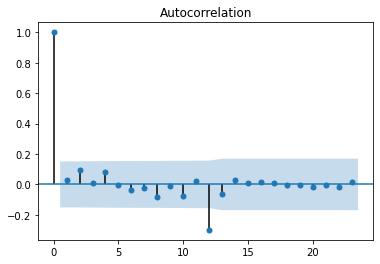

In [41]:
plot_acf(results.resid)
plt.show()

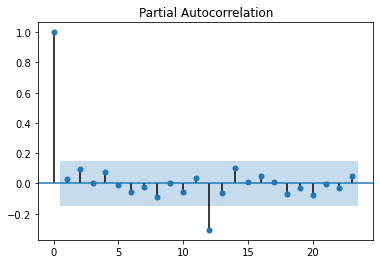

In [43]:
plot_pacf(results.resid)
plt.show()

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 42.1 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
from pmdarima.arima import auto_arima

arima_ = auto_arima(y=df['Milk produced'], start_p=3, d=1, 
                   start_q=3, max_p=7, max_d=2, max_q=7,
                   start_P=0, D=1, start_Q=0, max_P=2, max_D=2, max_Q=2, m=12, seasonal=True, n_fits=1000,
                   supress_warnings=False, trace=True, stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1119.969, Time=0.07 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1072.280, Time=0.18 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1074.086, Time=1.11 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1089.113, Time=0.36 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1074.131, Time=0.75 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=5.80 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1080.886, Time=0.65 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=1075.400, Time=0.99 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=3.47 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1114.995, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1066.296, Time=0.33 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1067.976, Time=0.87 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1082.123, Time=0.18 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1068.030, Time=0.50 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=4.94 sec
 ARIMA(0,1

In [ ]:
arima_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  168
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -530.104
Date:                              Wed, 22 Feb 2023   AIC                           1066.207
Time:                                      19:12:41   BIC                           1075.337
Sample:                                  01-01-1962   HQIC                          1069.916
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2253      0.077     -2.925      0.003      -0.376      -0.074
ma.S.L12      -0.6190      0.070     -8.825      0.000      -0.757      -0.482
sigma2        52.6908      4.897     10.759      0.000      43.093      62.289
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                35.11
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             0.74
Prob(H) (two-sided):                  0.49   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
p = range(0,3)

d = range(0,2)

q = range(0,3)

In [54]:
import itertools

list(itertools.product(p, d, q))

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2)]

In [55]:
list(itertools.product(range(0,3), range(1,2), range(0,3)))

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2)]

In [ ]:
import itertools
import warnings

# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 5) ## experiment with p [0,1,2,3,4,5], q = [0,1,2,3,4,5]
d = range(1,3) ## d = [1, 2]

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(range(0,3), range(1,2), range(0,3)))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df['Milk produced'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 2, 12)
SARIMAX: (0, 1, 2) x (1, 1, 0, 12)
SARIMAX: (0, 1, 2) x (1, 1, 1, 12)
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1113.3016402514772
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:980.377254004642
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:899.9807422705869
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:1010.162769102404
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:983.6057147894915
ARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:900.6874122190266
ARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:917.0873067317734
ARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:918.5227054905025
ARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:902.6841592294231
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:1101.5458031052915
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:965.6194210435326
ARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:887.9110136125054
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:1001.0530217668479
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:968.0689536698894
ARIMA(0, 1, 1)x(1, 1, 2, 12)12 

In [ ]:
len(df['Milk produced'])

168

In [ ]:
df

,Milk produced,forecast
Month,,
1962-01-01,589.0,NaN
1962-02-01,561.0,NaN
1962-03-01,640.0,NaN
1962-04-01,656.0,NaN
1962-05-01,727.0,NaN
...,...,...
1975-08-01,858.0,857.281309
1975-09-01,817.0,808.394758
1975-10-01,827.0,810.605945


In [ ]:
results.predict(start= 128, end = 138,dynamic = True) ### forecast the value for 118th month using the model

1972-09-01    813.696890
1972-10-01    820.136163
1972-11-01    786.736139
1972-12-01    825.306337
1973-01-01    855.814105
1973-02-01    819.315441
1973-03-01    914.412100
1973-04-01    929.652928
1973-05-01    991.751129
1973-06-01    964.960377
1973-07-01    921.717331
Freq: MS, Name: predicted_mean, dtype: float64

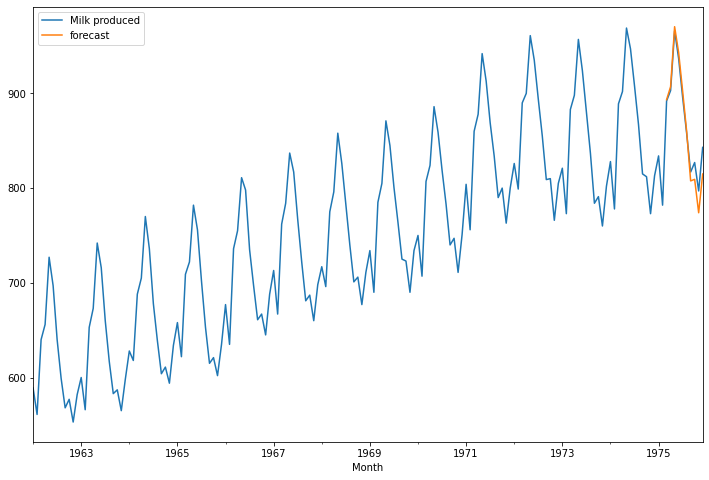

In [ ]:
df['forecast'] = results.predict(start= 158, end = 168,dynamic = True)  
df[['Milk produced','forecast']].plot(figsize = (12, 8))

In [ ]:
df.tail()

,Milk produced,forecast
Month,,
1975-08-01,858.0,857.075366
1975-09-01,817.0,808.168621
1975-10-01,827.0,810.368969
1975-11-01,797.0,773.849742
1975-12-01,843.0,813.837229


In [ ]:
results.predict(start= 168, end = 180,dynamic = True)

1976-01-01     865.349739
1976-02-01     818.387706
1976-03-01     925.019489
1976-04-01     938.096591
1976-05-01    1001.238546
1976-06-01     973.830260
1976-07-01     932.477681
1976-08-01     892.889158
1976-09-01     846.994443
1976-10-01     852.166204
1976-11-01     818.130555
1976-12-01     860.408590
1977-01-01     883.596821
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
from pandas.tseries.offsets import DateOffset

In [ ]:
future_dates = [df.index[-1] + DateOffset(months = x) for x in range(0,14)]

In [ ]:
future_dates

[Timestamp('1975-12-01 00:00:00'),
 Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00')]

In [ ]:
future_dates_df = pd.DataFrame(index = future_dates[1:],columns = df.columns)

In [ ]:
future_df = pd.concat([df,future_dates_df])

In [ ]:
future_df.tail(20)

,Milk produced,forecast
1975-06-01,937.0,939.207388
1975-07-01,896.0,897.642551
1975-08-01,858.0,857.075366
1975-09-01,817.0,808.168621
1975-10-01,827.0,810.368969
1975-11-01,797.0,773.849742
1975-12-01,843.0,813.837229
1976-01-01,NaN,NaN
1976-02-01,NaN,NaN
1976-03-01,NaN,NaN


In [ ]:
future_df.tail()

,Milk produced,forecast
1976-09-01,NaN,NaN
1976-10-01,NaN,NaN
1976-11-01,NaN,NaN
1976-12-01,NaN,NaN
1977-01-01,NaN,NaN


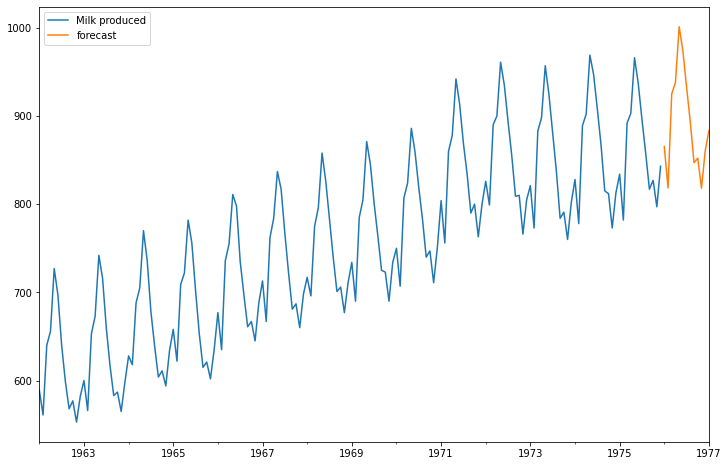

In [ ]:
future_df['forecast'] = results.predict(start = 168, end = 180,dynamic= True)  
future_df[['Milk produced', 'forecast']].plot(figsize = (12, 8)) 